In [42]:
import pandas as pd
import seaborn as sn

                                    LOADING DATASET

In [43]:
df =pd.read_excel("loan_data_set.xlsx")

                        CONVERTING OUR EXCEL DATA INTO CSV

In [44]:
df.to_csv("loan_data_set.csv", index=False)


print("converted successfully!")

converted successfully!


                                LOADING OUR CSV DATASET

In [45]:
df = pd.read_csv("loan_data_set.csv")

                            STATISTICAL ANALYSIS

In [46]:
df.shape

(614, 13)

In [47]:
df.info()  # To check data types and non-null counts
df.describe()  # Statistical summary for numerical columns
df.describe(include=['O'])  # Statistical summary for categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [48]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [49]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

                            EXPLORATORY DATAANALYSIS

In [50]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


DETERMINING CATEGORICAL COLUMNS

In [51]:
gender = df['Gender'].value_counts()
print(gender)

Gender
Male      489
Female    112
Name: count, dtype: int64


In [52]:
marital_status = df['Married'].value_counts()
print(marital_status)

Married
Yes    398
No     213
Name: count, dtype: int64


In [53]:
education = df['Education'].value_counts()
print(education)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


In [54]:
employement = df['Self_Employed'].value_counts()
print(employement)

Self_Employed
No     500
Yes     82
Name: count, dtype: int64


In [55]:
property_area = df['Property_Area'].value_counts()
print(property_area)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [56]:
loan_status = df['Loan_Status'].value_counts()
print(loan_status)

Loan_Status
Y    422
N    192
Name: count, dtype: int64


DATA CLEANING

In [57]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

DROPPING LOAN ID

In [58]:
df.drop(columns=["Loan_ID"], inplace=True)

print("Dropped Successfully!")

Dropped Successfully!


In [59]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


VISUALISIG DISTRIBUTION BEFORE FILLING MISSING VALUES

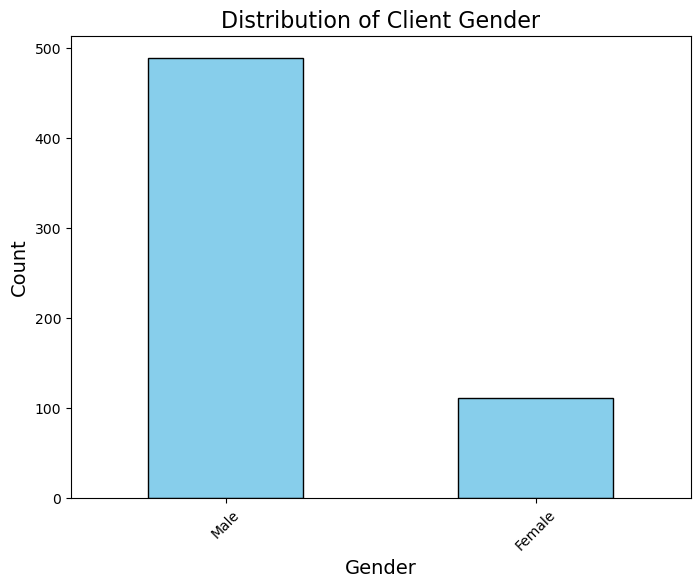

In [60]:
import matplotlib.pyplot as plt

client_marital_status = df['Gender'].value_counts()

# Plotting the graph
plt.figure(figsize=(8, 6))
client_marital_status.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Client Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()


FILLING MISSING VALUES WITH FEMALE

In [61]:
# Fill missing values with female
df['Gender'].fillna('Female', inplace=True)

# Verify if there are still missing values
print(f"Missing values in client gender is: {df['Gender'].isnull().sum()}")

Missing values in client gender is: 0


VISUALISING DISTRIBUTION AFTER FILLING MISSING VALUES

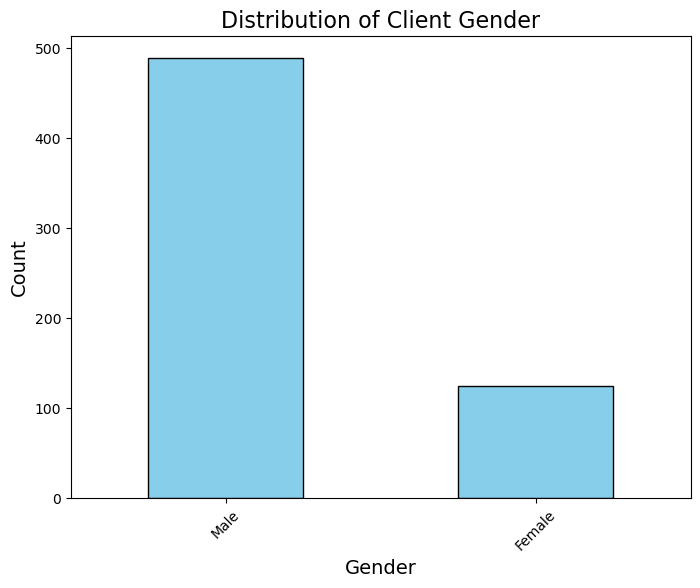

In [62]:
client_marital_status = df['Gender'].value_counts()

# Plotting the graph
plt.figure(figsize=(8, 6))
client_marital_status.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Client Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [63]:
gender = df['Gender'].value_counts()
print(gender)

Gender
Male      489
Female    125
Name: count, dtype: int64


CONVERTING THE COLUMN TO CATEGORY

In [64]:
# Convert Gender column to categorical type
df['Gender'] = df['Gender'].astype('category')

# Confirm the conversion
print(f"Data type of Gender after conversion: {df['Gender'].dtype}")

# Check the categories
print(f"\nCategories in Gender: {df['Gender'].cat.categories}")

Data type of Gender after conversion: category

Categories in Gender: Index(['Female', 'Male'], dtype='object')


REPEATING THE SAME STEPS WE DID WITH GENDER COLUMN

In [65]:

# Fill missing values with Yes
df['Self_Employed'].fillna('Yes', inplace=True)

# Verify if there are still missing values
print(f"Missing values in client self employment is: {df['Self_Employed'].isnull().sum()}")

Missing values in client self employment is: 0


In [66]:
# Convert Self_Employed column to categorical type
df['Self_Employed'] = df['Self_Employed'].astype('category')

# Confirm the conversion
print(f"Data type of Self_Employed after conversion: {df['Self_Employed'].dtype}")

# Check the categories
print(f"\nCategories in Self_Employed: {df['Self_Employed'].cat.categories}")

Data type of Self_Employed after conversion: category

Categories in Self_Employed: Index(['No', 'Yes'], dtype='object')


In [67]:
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
# Fill missing values with no
df['Married'].fillna('No', inplace=True)

# Verify if there are still missing values
print(f"Missing values in client maried is: {df['Married'].isnull().sum()}")

Missing values in client maried is: 0


In [69]:
# Convert Married column to categorical type
df['Married'] = df['Married'].astype('category')

# Confirm the conversion
print(f"Data type of Married after conversion: {df['Married'].dtype}")

# Check the categories
print(f"\nCategories in Married: {df['Married'].cat.categories}")

Data type of Married after conversion: category

Categories in Married: Index(['No', 'Yes'], dtype='object')


In [70]:
# Convert Property_Area column to categorical type
df['Property_Area'] = df['Property_Area'].astype('category')

# Confirm the conversion
print(f"Data type of Property_Area after conversion: {df['Property_Area'].dtype}")

# Check the categories
print(f"\nCategories in Property_Area: {df['Property_Area'].cat.categories}")

Data type of Property_Area after conversion: category

Categories in Property_Area: Index(['Rural', 'Semiurban', 'Urban'], dtype='object')


In [71]:
# Convert Loand_Status column to categorical type
df['Loan_Status'] = df['Loan_Status'].astype('category')

# Confirm the conversion
print(f"Data type of Loan_Status after conversion: {df['Loan_Status'].dtype}")

# Check the categories
print(f"\nCategories in Loan_Status: {df['Loan_Status'].cat.categories}")

Data type of Loan_Status after conversion: category

Categories in Loan_Status: Index(['N', 'Y'], dtype='object')


In [72]:
# Convert Education column to categorical type
df['Education'] = df['Education'].astype('category')

# Confirm the conversion
print(f"Data type of Education after conversion: {df['Education'].dtype}")

# Check the categories
print(f"\nCategories in Education: {df['Education'].cat.categories}")

Data type of Education after conversion: category

Categories in Education: Index(['Graduate', 'Not Graduate'], dtype='object')


In [73]:
# Convert Dependents column to categorical type
df['Dependents'] = df['Dependents'].astype('category')

# Confirm the conversion
print(f"Data type of Dependents after conversion: {df['Dependents'].dtype}")

# Check the categories
print(f"\nCategories in Dependents: {df['Dependents'].cat.categories}")

Data type of Dependents after conversion: category

Categories in Dependents: Index(['0', '1', '2', '3+'], dtype='object')


In [74]:
df.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status          category
dtype: object

In [75]:
# Fill missing values with 3+
df['Dependents'].fillna('3+', inplace=True)

# Verify if there are still missing values
print(f"Missing values in client Dependents is: {df['Dependents'].isnull().sum()}")

Missing values in client Dependents is: 0


In [76]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
# Fill LoanAmount using median
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)

In [79]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
bins = [0, 100, 200, 1000]
labels = ["small", "medium", "large"]
df["LoanAmount_Group"] = pd.cut(df["LoanAmount"], bins=bins, labels=labels)

def fill_loan_term(row):
    if pd.isna(row["Loan_Amount_Term"]):
        group = row["LoanAmount_Group"]
        mode = df[df["LoanAmount_Group"] == group]["Loan_Amount_Term"].mode()
        return mode[0] if not mode.empty else df["Loan_Amount_Term"].mode()[0]
    return row["Loan_Amount_Term"]

df["Loan_Amount_Term"] = df.apply(fill_loan_term, axis=1)

In [81]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Group
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,small
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,medium
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


In [82]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Group      0
dtype: int64

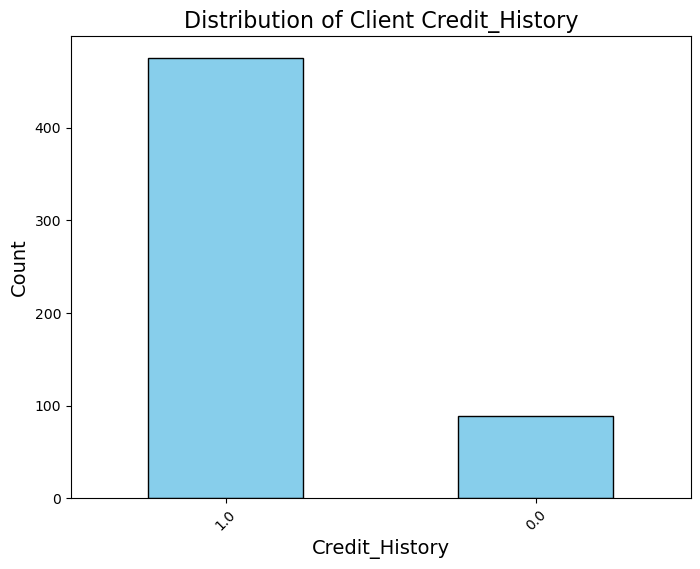

In [83]:
credit_history = df['Credit_History'].value_counts()

# Plotting the graph
plt.figure(figsize=(8, 6))
credit_history.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Client Credit_History', fontsize=16)
plt.xlabel('Credit_History', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [84]:
# Fill missing values with 0.0
df['Credit_History'].fillna(0.0, inplace=True)

# Verify if there are still missing values
print(f"Missing values in client Credit_History is: {df['Credit_History'].isnull().sum()}")

Missing values in client Credit_History is: 0


In [85]:
df.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status          category
LoanAmount_Group     category
dtype: object

In [86]:
# Convert Education column to categorical type
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')

In [87]:
df.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term        int32
Credit_History        float64
Property_Area        category
Loan_Status          category
LoanAmount_Group     category
dtype: object

                STATISTICAL ANALYSIS FOR LOAN AMOUNT COLUMN

In [93]:
# Basic statistical description


loan_amount = df['LoanAmount']


# Basic stats
print(loan_amount.describe())

count    6.140000e+02
mean     1.457524e+02
std      1.479134e-12
min      1.457524e+02
25%      1.457524e+02
50%      1.457524e+02
75%      1.457524e+02
max      1.457524e+02
Name: LoanAmount, dtype: float64


In [94]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


loan_mode = df['LoanAmount'].mode()

print(f"Loan amount mode is: {loan_mode}")

Loan amount mode is: 0    145.752443
Name: LoanAmount, dtype: float64


VARIANCE

In [95]:
print(f"Variance: {loan_amount.var()}")

Variance: 2.1878370575595808e-24
Coefficient of Variation: 1.0148261375428315e-14


SKEWNESS

In [105]:
print(f"Skewness: {loan_amount.skew()}")

Skewness: 0


PERCENTILES

In [97]:
print(f"10th Percentile: {loan_amount.quantile(0.10)}")
print(f"90th Percentile: {loan_amount.quantile(0.90)}")

10th Percentile: 145.75244299674267
90th Percentile: 145.75244299674267


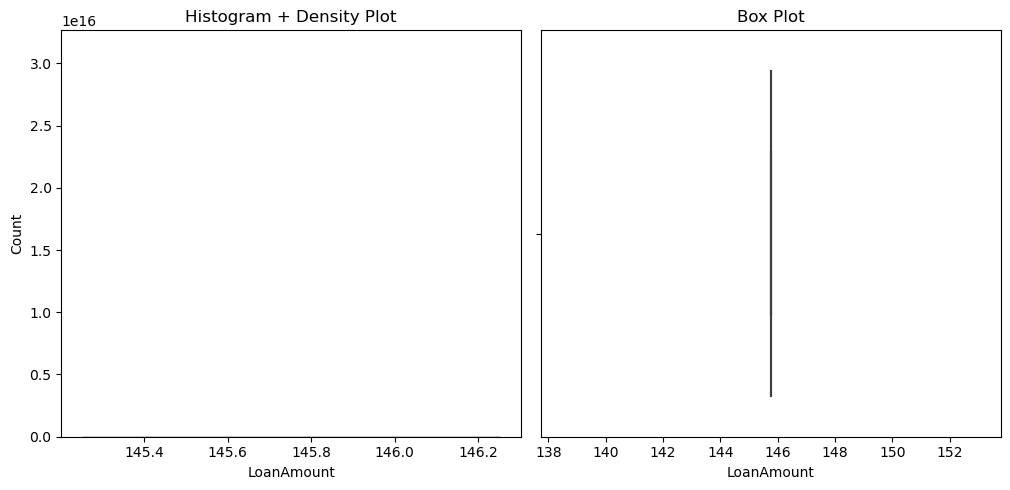

In [106]:
# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(loan_amount, kde=True)
plt.title('Histogram + Density Plot')


#Outlier detection
plt.subplot(1, 3, 2)
sns.boxplot(x=loan_amount)
plt.title('Box Plot')

plt.tight_layout()
plt.show()

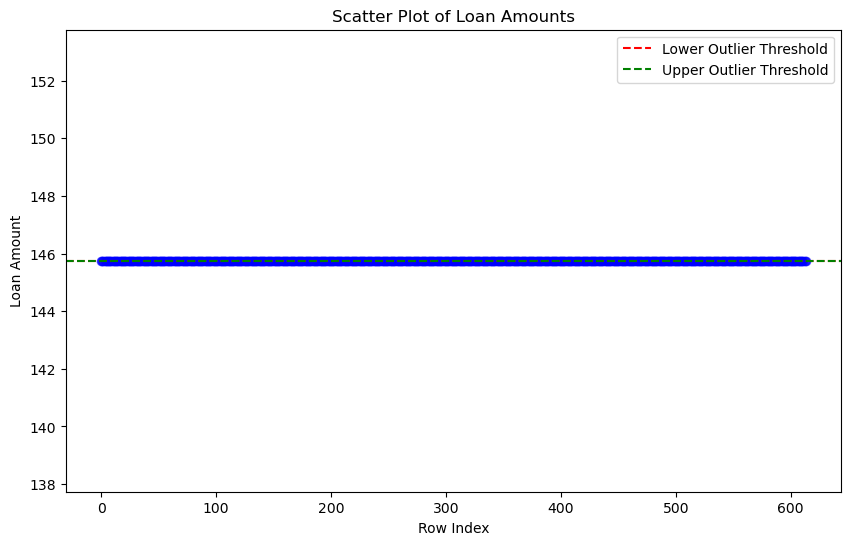

In [99]:
plt.figure(figsize=(10, 6))

# X-axis: Row index; Y-axis: LoanAmount
plt.scatter(x=df.index, y=df['LoanAmount'], color='blue', alpha=0.6)

plt.title('Scatter Plot of Loan Amounts')
plt.xlabel('Row Index')
plt.ylabel('Loan Amount')

# Optional: Draw horizontal lines at important percentiles
q1 = df['LoanAmount'].quantile(0.25)
q3 = df['LoanAmount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Outlier Threshold')
plt.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Outlier Threshold')

plt.legend()
plt.show()

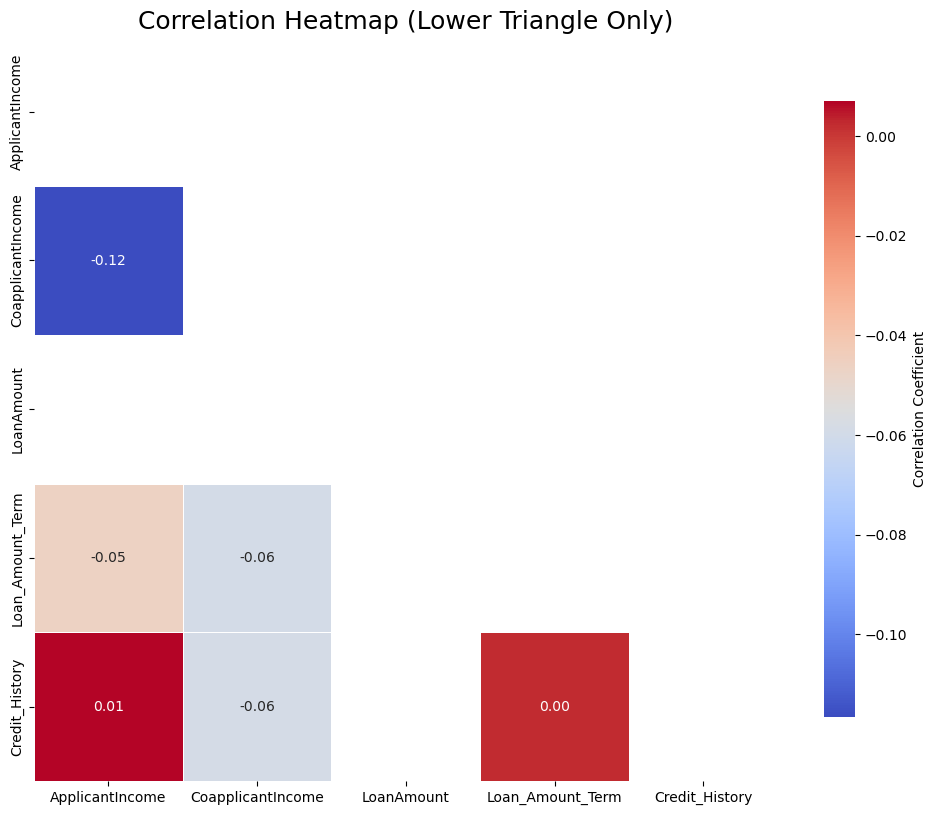

In [103]:
import numpy as np

numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32'])
correlation_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8, 'label': 'Correlation Coefficient'}
)

plt.title('Correlation Heatmap (Lower Triangle Only)', fontsize=18)

plt.show()


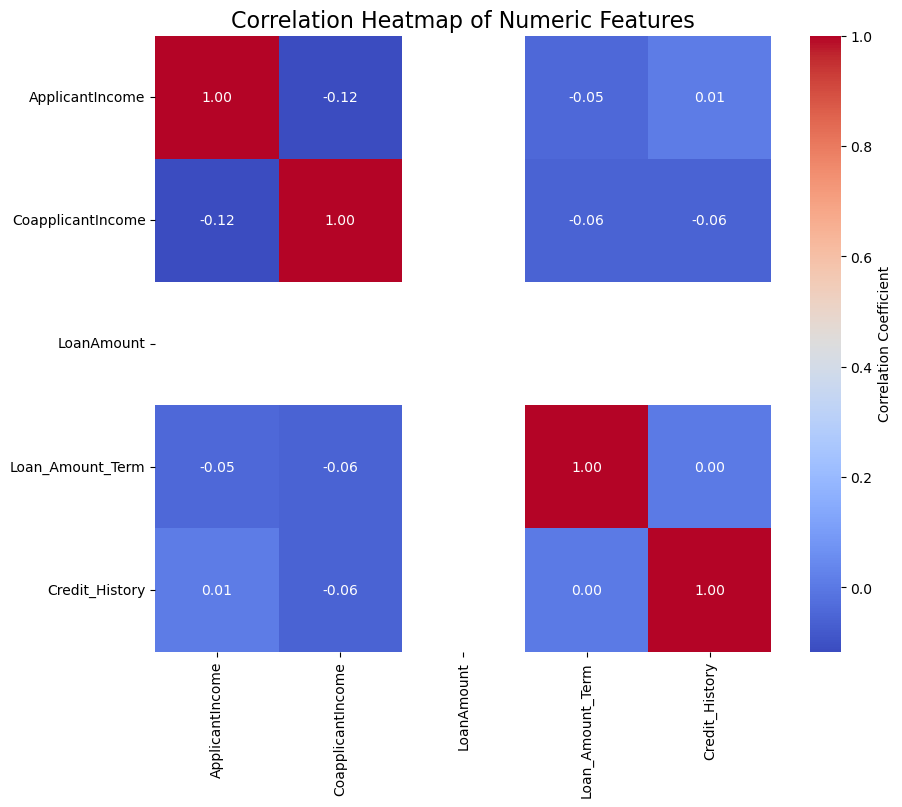

In [101]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)

# Add title
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)

# Show the plot
plt.show()

In [107]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Group
0,Male,No,0,Graduate,No,5849,0.0,145.752443,360,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,145.752443,360,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,145.752443,360,1.0,Urban,Y,small
3,Male,Yes,0,Not Graduate,No,2583,2358.0,145.752443,360,1.0,Urban,Y,medium
4,Male,No,0,Graduate,No,6000,0.0,145.752443,360,1.0,Urban,Y,medium


In [108]:
!git init

Initialized empty Git repository in C:/Users/Mzanzi/Desktop/Data Science Projects/AI/.git/


In [109]:
!git remote add origin https://github.com/LeratoTheko/Motz-Loan-Prediction.git

In [112]:
!git add group_assignment.ipynb

fatal: pathspec 'group_assignment.ipynb' did not match any files


In [113]:
pip install jupyterlab-git


  Obtaining dependency information for jupyterlab-git from https://files.pythonhosted.org/packages/6e/24/aeaf105914fb844aeed6d579108eaf6c285592edbdb2ab2cf0bc7b33204f/jupyterlab_git-0.51.1-py3-none-any.whl.metadata
  Using cached jupyterlab_git-0.51.1-py3-none-any.whl.metadata (32 kB)
  Obtaining dependency information for jupyter-server<3,>=2.0.1 from https://files.pythonhosted.org/packages/e2/a2/89eeaf0bb954a123a909859fa507fa86f96eb61b62dc30667b60dbd5fdaf/jupyter_server-2.15.0-py3-none-any.whl.metadata
  Using cached jupyter_server-2.15.0-py3-none-any.whl.metadata (8.4 kB)
  Obtaining dependency information for nbdime~=4.0.1 from https://files.pythonhosted.org/packages/73/23/824b295f4cc53f4437f6917e8f46c519cd3a9be909dd36ca0682fdc7fff1/nbdime-4.0.2-py3-none-any.whl.metadata
  Using cached nbdime-4.0.2-py3-none-any.whl.metadata (9.5 kB)
  Obtaining dependency information for jupyter-events>=0.11.0 from https://files.pythonhosted.org/packages/e2/48/577993f1f99c552f18a0428731a755e06171f9

In [115]:
!jupyter labextension install @jupyterlab/git

print("Done!")

An error occurred.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  C:\Users\Mzanzi\AppData\Local\Temp\jupyterlab-debug-gzghst3n.log
Done!


(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
